# Kevin Alvarez CSC 217 Fall 2019 Final Project



Data was gathered from National Survey on Drug Use and Health, 2012 (ICPSR 34933) Downloaded from https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv Loaded in from a csv file. Features 17 different age groups. Younger ages seemed to be surveyed more and therefore broken up. 
* Column (drug)-use includes percentage of n that used said drug in the past 12 months. 
* Column (drug)-frequency includes median number of how times a user in the age group used said drug in the past 12 months.

In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
data  

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3,1.1,4,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5,8.7,24,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24,33.7,52,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36,33.4,60,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48,34.0,60,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52,33.0,52,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


Creating two dataframes, one for just frequency and one for use.

In [3]:
frequency_columns = []
use_columns = []

for col in data.columns:
    if('frequency' in col):
        frequency_columns.append(col);
for col in data.columns:
    if('use' in col):
        use_columns.append(col);
        
frequency_data = data.drop(use_columns,axis=1)
use_data = data.drop(frequency_columns,axis=1)

# Exploratory Analysis

## Visualizing Different Drug Frequencies

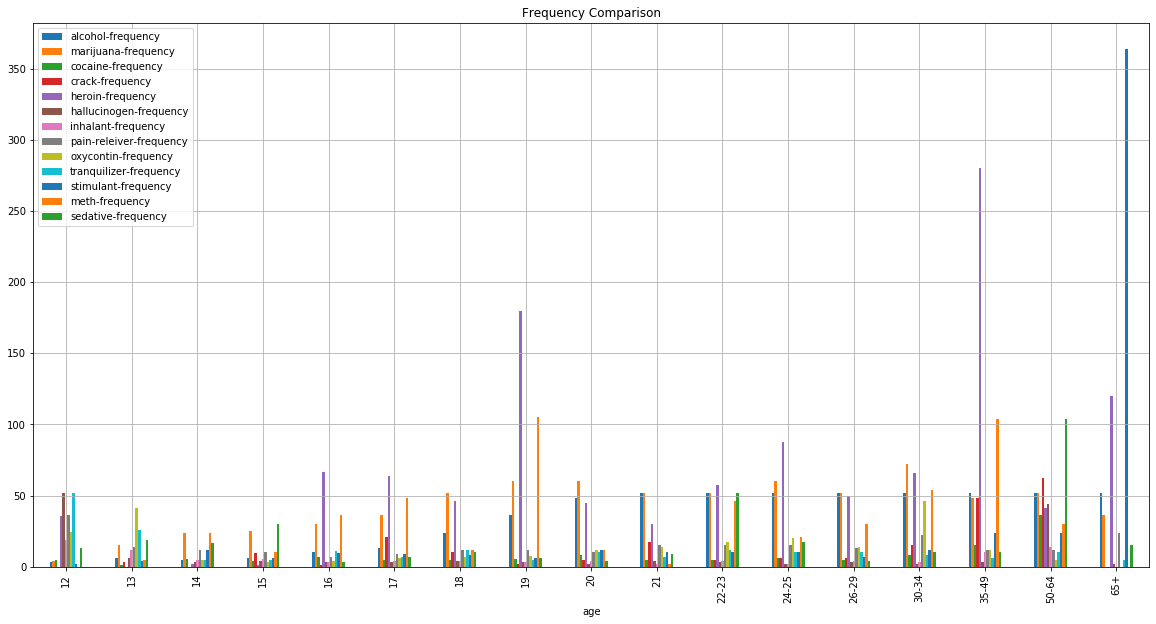

In [4]:
data.plot(x='age',y = frequency_columns ,grid = True, kind='bar',title='Frequency Comparison',figsize=(20,10))

Text(0.5, 0.92, 'Drug Frequency Boxplot')

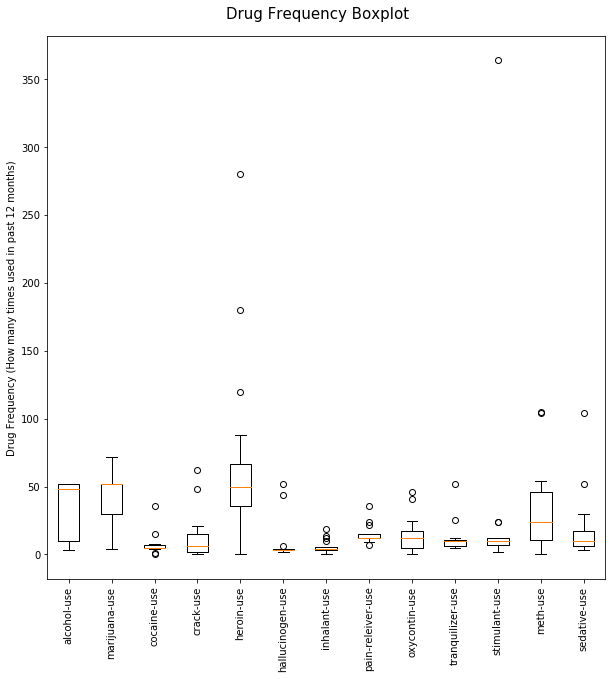

In [5]:
fig = plt.figure(figsize=(10,10))
boxplot_data = []
ticks = []
for index,col in enumerate(frequency_columns):
    boxplot_data.append(data[col])
    ticks.append(index + 1)
plt.boxplot(boxplot_data)
plt.xticks(ticks, use_columns,rotation=90)
plt.ylabel("Drug Frequency (How many times used in past 12 months)")
fig.suptitle("Drug Frequency Boxplot", fontsize=15, y=0.92)

Just from a simple visualization we see that marijuana is used the most in most age groups, with a noticeable outlier of ages 65+ using stimulants around 360 times in a year. This might show that those using stimulants are prescribed it and therefore use it everyday.

## Visualizing Different Drug Use

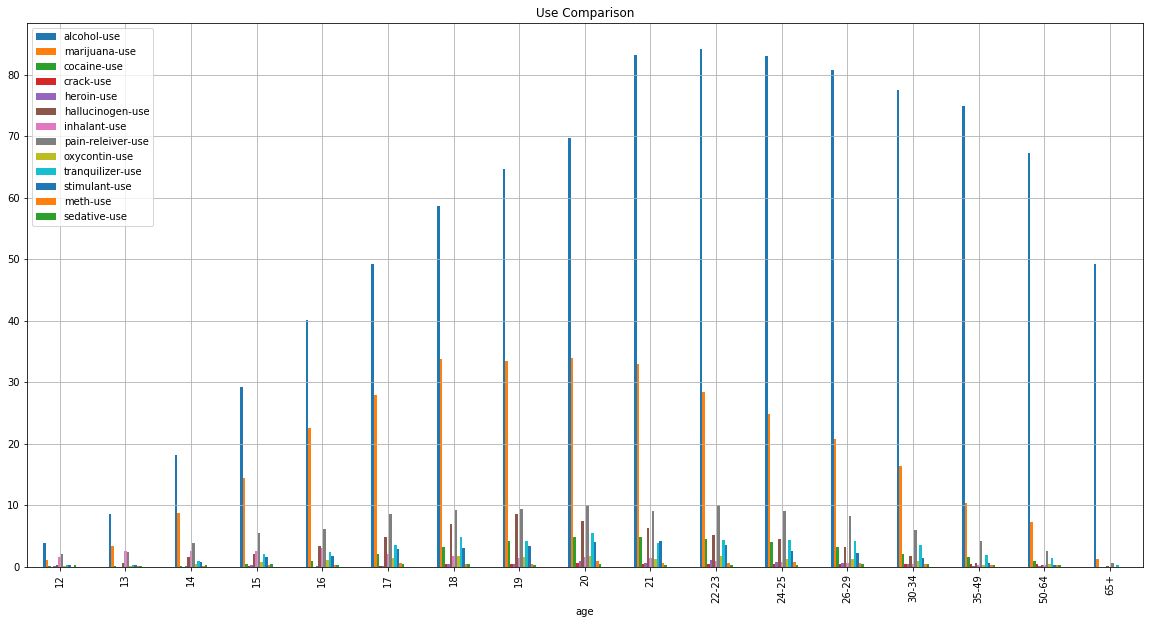

In [6]:
data.plot(x='age',y = use_columns ,grid = True, kind='bar',title='Use Comparison',figsize=(20,10))

Text(0.5, 0.92, 'Drug Use Boxplot')

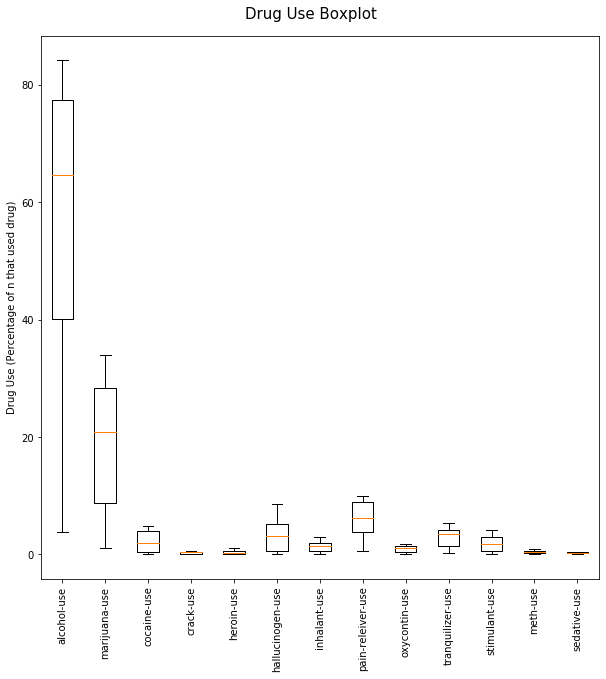

In [7]:
fig = plt.figure(figsize=(10,10))
boxplot_data = []
ticks = []
for index,col in enumerate(use_columns):
    boxplot_data.append(data[col])
    ticks.append(index + 1)
plt.boxplot(boxplot_data)
plt.xticks(ticks, use_columns,rotation=90)
plt.ylabel("Drug Use (Percentage of n that used drug)")
fig.suptitle("Drug Use Boxplot", fontsize=15, y=0.92)

These graph shows that a higher percentage of people consume alcohol in each age group by a large margin. This might be due to its legality. We also see that there is an increase of alcohol use in each age group until the age of 22 and then slowly goes down a bit. It hits its peak around the age alcohol becomes legal to drink in the United States.

## Exploring both Frequency and Use values

In [8]:
# Mean Frequency of each drug
data[frequency_columns].mean()

alcohol-frequency          33.352941
marijuana-frequency        42.941176
cocaine-frequency           7.411765
crack-frequency            12.382353
heroin-frequency           68.970588
hallucinogen-frequency      8.411765
inhalant-frequency          5.794118
pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
tranquilizer-frequency     11.735294
stimulant-frequency        31.147059
meth-frequency             31.735294
sedative-frequency         19.382353
dtype: float64

In [9]:
# Mean Drug use of each drug
data[use_columns].mean()

alcohol-use          55.429412
marijuana-use        18.923529
cocaine-use           2.176471
crack-use             0.294118
heroin-use            0.352941
hallucinogen-use      3.394118
inhalant-use          1.388235
pain-releiver-use     6.270588
oxycontin-use         0.935294
tranquilizer-use      2.805882
stimulant-use         1.917647
meth-use              0.382353
sedative-use          0.282353
dtype: float64

In [10]:
# Maximum of Frequency
data[frequency_columns].max()

alcohol-frequency           52.0
marijuana-frequency         72.0
cocaine-frequency           36.0
crack-frequency             62.0
heroin-frequency           280.0
hallucinogen-frequency      52.0
inhalant-frequency          19.0
pain-releiver-frequency     36.0
oxycontin-frequency         46.0
tranquilizer-frequency      52.0
stimulant-frequency        364.0
meth-frequency             105.0
sedative-frequency         104.0
dtype: float64

In [11]:
# Mininum of Frequency
data[frequency_columns].min()

alcohol-frequency          3.0
marijuana-frequency        4.0
cocaine-frequency          0.0
crack-frequency            0.0
heroin-frequency           0.0
hallucinogen-frequency     2.0
inhalant-frequency         0.0
pain-releiver-frequency    7.0
oxycontin-frequency        0.0
tranquilizer-frequency     4.5
stimulant-frequency        2.0
meth-frequency             0.0
sedative-frequency         3.0
dtype: float64

In [12]:
# Maximum of Use
data[use_columns].max()

alcohol-use          84.2
marijuana-use        34.0
cocaine-use           4.9
crack-use             0.6
heroin-use            1.1
hallucinogen-use      8.6
inhalant-use          3.0
pain-releiver-use    10.0
oxycontin-use         1.7
tranquilizer-use      5.4
stimulant-use         4.1
meth-use              0.9
sedative-use          0.5
dtype: float64

In [13]:
# Minimum of Use
data[use_columns].min()

alcohol-use          3.9
marijuana-use        1.1
cocaine-use          0.0
crack-use            0.0
heroin-use           0.0
hallucinogen-use     0.1
inhalant-use         0.0
pain-releiver-use    0.6
oxycontin-use        0.0
tranquilizer-use     0.2
stimulant-use        0.0
meth-use             0.0
sedative-use         0.0
dtype: float64

In [14]:
# Variance of frequency
data[frequency_columns].var()

alcohol-frequency           454.492647
marijuana-frequency         337.183824
cocaine-frequency            64.226103
crack-frequency             301.422794
heroin-frequency           4921.483456
hallucinogen-frequency      225.007353
inhalant-frequency           24.376838
pain-releiver-frequency      48.095588
oxycontin-frequency         166.465074
tranquilizer-frequency      131.909926
stimulant-frequency        7391.492647
meth-frequency             1037.253676
sedative-frequency          616.704044
dtype: float64

In [15]:
# Variance of use
data[use_columns].var()

alcohol-use          722.473456
marijuana-use        143.035662
cocaine-use            3.300662
crack-use              0.055588
heroin-use             0.111397
hallucinogen-use       7.798088
inhalant-use           0.859853
pain-releiver-use     10.025956
oxycontin-use          0.369926
tranquilizer-use       3.074338
stimulant-use          1.981544
meth-use               0.069044
sedative-use           0.019044
dtype: float64

In [16]:
# Range of frequency
data[frequency_columns].max() - data[frequency_columns].min()

alcohol-frequency           49.0
marijuana-frequency         68.0
cocaine-frequency           36.0
crack-frequency             62.0
heroin-frequency           280.0
hallucinogen-frequency      50.0
inhalant-frequency          19.0
pain-releiver-frequency     29.0
oxycontin-frequency         46.0
tranquilizer-frequency      47.5
stimulant-frequency        362.0
meth-frequency             105.0
sedative-frequency         101.0
dtype: float64

In [17]:
# Range of use
data[use_columns].max() - data[use_columns].min()

alcohol-use          80.3
marijuana-use        32.9
cocaine-use           4.9
crack-use             0.6
heroin-use            1.1
hallucinogen-use      8.5
inhalant-use          3.0
pain-releiver-use     9.4
oxycontin-use         1.7
tranquilizer-use      5.2
stimulant-use         4.1
meth-use              0.9
sedative-use          0.5
dtype: float64

In [18]:
# Frequency Interquatile Range
data[frequency_columns].quantile(q=0.75) - data[frequency_columns].quantile(q=0.25)

alcohol-frequency          42.0
marijuana-frequency        22.0
cocaine-frequency           2.0
crack-frequency            13.0
heroin-frequency           31.0
hallucinogen-frequency      1.0
inhalant-frequency          2.5
pain-releiver-frequency     3.0
oxycontin-frequency        12.5
tranquilizer-frequency      5.0
stimulant-frequency         5.0
meth-frequency             35.5
sedative-frequency         11.0
dtype: float64

In [19]:
# Use Interquatile Range
data[use_columns].quantile(q=0.75) - data[use_columns].quantile(q=0.25)

alcohol-use          37.4
marijuana-use        19.7
cocaine-use           3.5
crack-use             0.5
heroin-use            0.5
hallucinogen-use      4.6
inhalant-use          1.4
pain-releiver-use     5.1
oxycontin-use         1.0
tranquilizer-use      2.8
stimulant-use         2.4
meth-use              0.4
sedative-use          0.2
dtype: float64

# Chi Square Tests

## Chi Square Tests for Two Different Drug Frequencies

First we create the lists for each drug frequencies and then set up the rejection region with a degrees of freedom of 16. Since there are 17 outcomes and two distributions. (17 - 1) * (2 - 1)
* Null Hypothesis: is that the these two frequencies can come from the same distribution
* Alternate Hypothesis is that they come from another distribution

In [20]:
alcohol_frequencies = []
marijuana_frequencies = []
cocaine_frequencies = []
crack_frequencies = []
heroin_frequencies = []
hallucinogen_frequencies = []
inhalant_frequencies = []
pain_releiever_frequencies = []
oxycontin_frequencies = []
tranquilizer_frequencies = []
stimulant_frequencies = []
meth_frequencies = []
sedative_frequencies = []

for index, row in data.iterrows():
    alcohol_frequencies.append(data.at[index,'alcohol-frequency'])
    marijuana_frequencies.append(data.at[index,'marijuana-frequency'])
    cocaine_frequencies.append(data.at[index,'cocaine-frequency'])
    crack_frequencies.append(data.at[index,'crack-frequency'])
    heroin_frequencies.append(data.at[index,'heroin-frequency'])
    hallucinogen_frequencies.append(data.at[index,'hallucinogen-frequency'])
    inhalant_frequencies.append(data.at[index,'inhalant-frequency'])
    pain_releiever_frequencies.append(data.at[index,'pain-releiver-frequency'])
    oxycontin_frequencies.append(data.at[index,'oxycontin-frequency'])
    tranquilizer_frequencies.append(data.at[index,'tranquilizer-frequency'])
    stimulant_frequencies.append(data.at[index,'stimulant-frequency'])
    meth_frequencies.append(data.at[index,'meth-frequency'])
    sedative_frequencies.append(data.at[index,'sedative-frequency'])

Rejection Region: Greater than 26.3


Text(0.5, 0.92, 'Chi-Square Distribution with 16 Degrees of Freedom')

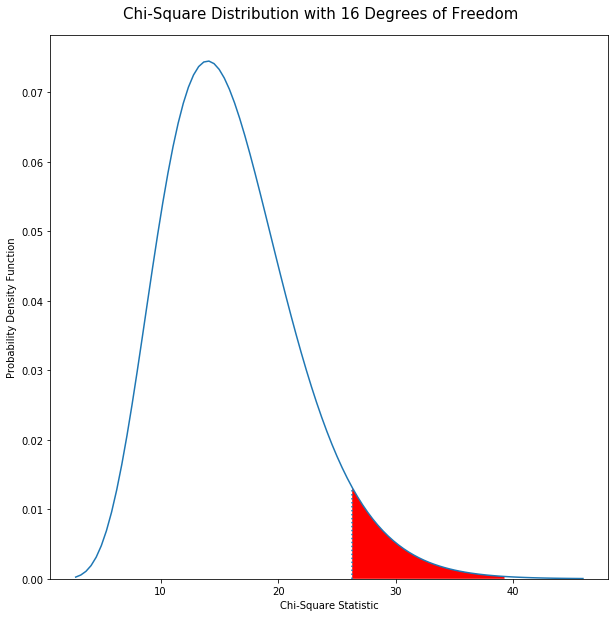

In [21]:
degrees_freedom = len(alcohol_frequencies) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [22]:
stats.chi2_contingency([alcohol_frequencies, marijuana_frequencies])

(53.76907381287019,
 5.6557322379107144e-06,
 16,
 array([[ 3.06013878,  9.18041635, 12.67771781, 13.55204318, 17.48650732,
         21.42097147, 33.22436392, 41.96761758, 47.21356978, 45.46491904,
         45.46491904, 48.96222051, 45.46491904, 54.20817271, 43.71626831,
         45.46491904, 38.47031611],
        [ 3.93986122, 11.81958365, 16.32228219, 17.44795682, 22.51349268,
         27.57902853, 42.77563608, 54.03238242, 60.78643022, 58.53508096,
         58.53508096, 63.03777949, 58.53508096, 69.79182729, 56.28373169,
         58.53508096, 49.52968389]]))

In [23]:
stats.chi2_contingency([marijuana_frequencies, hallucinogen_frequencies])

(362.39473600833384,
 2.6830384549216336e-67,
 16,
 array([[46.82703322, 17.56013746, 22.57731959, 24.24971363, 27.59450172,
         32.61168385, 46.82703322, 52.68041237, 51.84421535, 46.82703322,
         45.9908362 , 51.84421535, 45.9908362 , 61.87857961, 42.64604811,
         80.27491409, 31.77548683],
        [ 9.17296678,  3.43986254,  4.42268041,  4.75028637,  5.40549828,
          6.38831615,  9.17296678, 10.31958763, 10.15578465,  9.17296678,
          9.0091638 , 10.15578465,  9.0091638 , 12.12142039,  8.35395189,
         15.72508591,  6.22451317]]))

In [24]:
stats.chi2_contingency([heroin_frequencies, oxycontin_frequencies])

(398.8471928780818,
 6.351477556671292e-75,
 16,
 array([[ 49.91131607,  34.10606598,   5.40705924,   3.32742107,
          58.64579638,  58.22986875,  44.08832919, 155.97286272,
          47.41575027,  36.18570415,  62.38914509,  89.84036893,
          52.82280951,  93.16779   , 242.90173821,  38.26534232,
          99.82263214],
        [ 10.08868393,   6.89393402,   1.09294076,   0.67257893,
          11.85420362,  11.77013125,   8.91167081,  31.52713728,
           9.58424973,   7.31429585,  12.61085491,  18.15963107,
          10.67719049,  18.83221   ,  49.09826179,   7.73465768,
          20.17736786]]))

In [25]:
# :16 Since last element of both are 0 and causes error
stats.chi2_contingency([cocaine_frequencies[:16], hallucinogen_frequencies[:16]])

(64.47943624320452,
 4.214840416545216e-08,
 15,
 array([[26.8988764 ,  3.30337079,  4.01123596,  3.7752809 ,  4.71910112,
          3.7752809 ,  4.24719101,  4.01123596,  4.71910112,  4.24719101,
          3.7752809 ,  3.7752809 ,  3.7752809 ,  4.71910112,  8.49438202,
         37.75280899],
        [30.1011236 ,  3.69662921,  4.48876404,  4.2247191 ,  5.28089888,
          4.2247191 ,  4.75280899,  4.48876404,  5.28089888,  4.75280899,
          4.2247191 ,  4.2247191 ,  4.2247191 ,  5.28089888,  9.50561798,
         42.24719101]]))

We can reject the null hypothesis. The value we got from Chi2 Contigency is 53.769 and our rejection region is anything above 18.31

## Chi Square Tests for Two different Drug Use.

First we create the lists for each drug use count and then set up the rejection region with a degrees of freedom of 16. Since there are 17 outcomes and two distributions. (17 - 1) * (2 - 1). Same as previous chi square.
* Null Hypothesis: is that the these two frequencies can come from the same distribution
* Alternate Hypothesis is that they come from another distribution

In [26]:
alcohol_use = []
marijuana_use = []
cocaine_use = []
crack_use = []
heroin_use = []
hallucinogen_use = []
inhalant_use = []
pain_releiever_use = []
oxycontin_use = []
tranquilizer_use = []
stimulant_use = []
meth_use = []
sedative_use = []

for index, row in data.iterrows():
    alcohol_use.append(data.at[index,'alcohol-use'])
    marijuana_use.append(data.at[index,'marijuana-use'])
    cocaine_use.append(data.at[index,'cocaine-use'])
    crack_use.append(data.at[index,'crack-use'])
    heroin_use.append(data.at[index,'heroin-use'])
    hallucinogen_use.append(data.at[index,'hallucinogen-use'])
    inhalant_use.append(data.at[index,'inhalant-use'])
    pain_releiever_use.append(data.at[index,'pain-releiver-use'])
    oxycontin_use.append(data.at[index,'oxycontin-use'])
    tranquilizer_use.append(data.at[index,'tranquilizer-use'])
    stimulant_use.append(data.at[index,'stimulant-use'])
    meth_use.append(data.at[index,'meth-use'])
    sedative_use.append(data.at[index,'sedative-use'])

Rejection Region: Greater than 26.3


Text(0.5, 0.92, 'Chi-Square Distribution with 16 Degrees of Freedom')

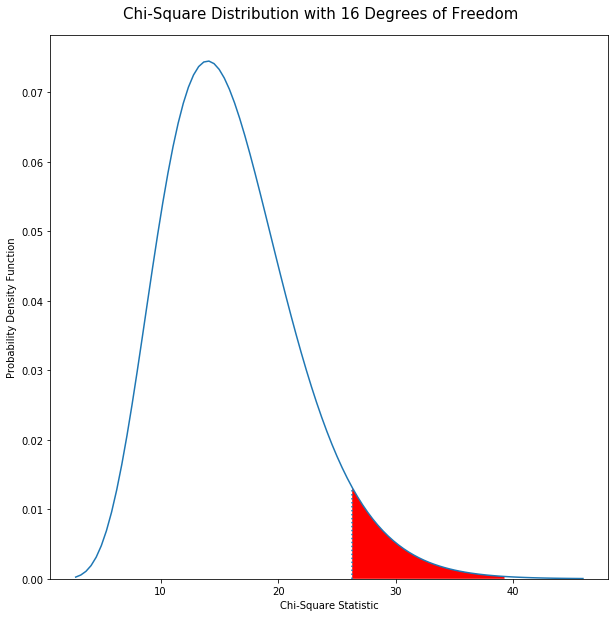

In [27]:
degrees_freedom = len(alcohol_frequencies) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [28]:
stats.chi2_contingency([alcohol_use, marijuana_use])

(60.279805638396574,
 4.6950716484037147e-07,
 16,
 array([[ 3.72745253,  8.87133703, 19.97914557, 32.57793513, 46.6677057 ,
         57.62641614, 68.88332278, 73.05806962, 77.30736551, 86.62599684,
         83.94223101, 80.51297468, 75.66728639, 70.00155854, 63.66488924,
         55.53904272, 37.64727057],
        [ 1.27254747,  3.02866297,  6.82085443, 11.12206487, 15.9322943 ,
         19.67358386, 23.51667722, 24.94193038, 26.39263449, 29.57400316,
         28.65776899, 27.48702532, 25.83271361, 23.89844146, 21.73511076,
         18.96095728, 12.85272943]]))

In [29]:
stats.chi2_contingency([marijuana_use, hallucinogen_use])

(3.54083405296351,
 0.9994953879807221,
 16,
 array([[ 1.10229309,  3.39167106,  8.73355298, 14.0754349 , 21.96107011,
         27.81170269, 34.51025303, 35.61254613, 35.10379547, 33.32316816,
         28.4900369 , 24.92878229, 20.35002636, 15.43210332,  9.32709541,
          6.44417501,  1.10229309],
        [ 0.19770691,  0.60832894,  1.56644702,  2.5245651 ,  3.93892989,
          4.98829731,  6.18974697,  6.38745387,  6.29620453,  5.97683184,
          5.1099631 ,  4.47121771,  3.64997364,  2.76789668,  1.67290459,
          1.15582499,  0.19770691]]))

In [30]:
stats.chi2_contingency([cocaine_use[:16], crack_use[:16]])

(1.2570919323897172,
 0.9999987397954455,
 15,
 array([[0.08809524, 0.08809524, 0.08809524, 0.52857143, 0.88095238,
         1.85      , 3.17142857, 4.05238095, 4.8452381 , 4.66904762,
         4.4047619 , 3.96428571, 3.17142857, 2.29047619, 1.76190476,
         1.1452381 ],
        [0.01190476, 0.01190476, 0.01190476, 0.07142857, 0.11904762,
         0.25      , 0.42857143, 0.54761905, 0.6547619 , 0.63095238,
         0.5952381 , 0.53571429, 0.42857143, 0.30952381, 0.23809524,
         0.1547619 ]]))

In [31]:
stats.chi2_contingency([heroin_use[:16],oxycontin_use[:16]])

(1.1491877180251064,
 0.9999993260400688,
 15,
 array([[0.05479452, 0.02739726, 0.1369863 , 0.2739726 , 0.32876712,
         0.4109589 , 0.57534247, 0.54794521, 0.71232877, 0.52054795,
         0.76712329, 0.54794521, 0.49315068, 0.35616438, 0.10958904,
         0.1369863 ],
        [0.14520548, 0.07260274, 0.3630137 , 0.7260274 , 0.87123288,
         1.0890411 , 1.52465753, 1.45205479, 1.88767123, 1.37945205,
         2.03287671, 1.45205479, 1.30684932, 0.94383562, 0.29041096,
         0.3630137 ]]))

## Chi Square Tests age distributions
For this we will change the degrees of freedom since there are now 13 different outcomes(drugs in the data) however we are still checking only two distributions.
First we will gather the data into separate python lists to work with.

In [ ]:
freq_age_12 = []
freq_age_13 = []
freq_age_14 = []
freq_age_15 = []
freq_age_16 = []
freq_age_17 = []
freq_age_18 = []
freq_age_19 = []
freq_age_20 = []
freq_age_21 = []
freq_age_22_23 = []
freq_age_24_25 = []
freq_age_26_29 = []
freq_age_30_34 = []
age_35_49 = []
age_50_64 = []
age_65 = []

for index, row in data.iterrows():
    alcohol_use.append(data.at[index,'alcohol-use'])
    marijuana_use.append(data.at[index,'marijuana-use'])
    cocaine_use.append(data.at[index,'cocaine-use'])
    crack_use.append(data.at[index,'crack-use'])
    heroin_use.append(data.at[index,'heroin-use'])
    hallucinogen_use.append(data.at[index,'hallucinogen-use'])
    inhalant_use.append(data.at[index,'inhalant-use'])
    pain_releiever_use.append(data.at[index,'pain-releiver-use'])
    oxycontin_use.append(data.at[index,'oxycontin-use'])
    tranquilizer_use.append(data.at[index,'tranquilizer-use'])
    stimulant_use.append(data.at[index,'stimulant-use'])
    meth_use.append(data.at[index,'meth-use'])
    sedative_use.append(data.at[index,'sedative-use'])

Rejection Region: Greater than 21.03


Text(0.5, 0.92, 'Chi-Square Distribution with 12 Degrees of Freedom')

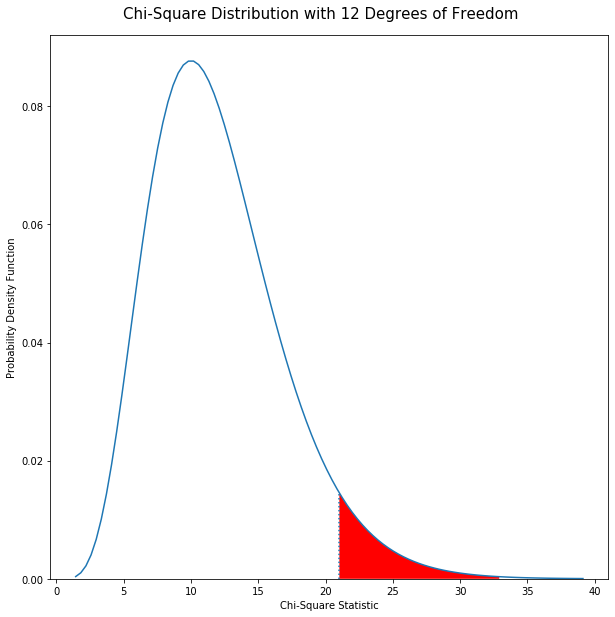

In [35]:
degrees_freedom = len(frequency_columns) - 1 # (Length of possible outcomes - 1) * (2 distributions - 1)
dist = stats.chi2(df=degrees_freedom)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with ' + str(degrees_freedom) + ' Degrees of Freedom', fontsize=15, y=0.92)

In [38]:
stats.chi2_contingency([frequency_data.loc['12'][[frequency_columns]], frequency_data.loc['13'][frequency_columns]])

KeyError: '12'